**1 HIDDEN LAYER = BASIC ANN**

**LOAD DATASET (TRAIN/VAL/TEST)**

In [1]:
import pandas as pd
train_df = pd.read_csv("data/train_balanced.csv")
val_df = pd.read_csv("data/val.csv")
test_df = pd.read_csv("data/test.csv")

In [2]:
train_df

,final_with_stopword,label
0,first time i have a visit at this office be aw...,0
1,not impressed people need to be re-trained if ...,0
2,do not like location,0
3,the thg therapist i have be nice but do absolu...,0
4,i buy my wife and i each a 60minute massage fr...,0
...,...,...
628387,please with the optometrist however price be q...,1
628388,knowledgeable friendly professional hygienist,1
628389,amaze grooming service,1
628390,nice store with good selection,1


In [3]:
val_df

,user_id,username,rating,original_text,gmap_id,business_name,translated_text,sentiment_label,sentiment_score,final_with_stopword,final_no_stopword,ori_wc,final_wc,final_no_stopword_wc,label
0,1.129292e+20,Chelsey Hadduck,5.0,Everyone was kind and loving with our Mittens....,0x54b8c623819a6463:0x511b0ae7c51b63e1,Alpine Veterinary Clinic,Everyone was kind and loving with our Mittens....,POSITIVE,0.998930,everyone be kind and loving with our mitten dr...,everyone kind loving mitten dr. kelley patient...,32,32,17,1
1,1.032709e+20,Ashley Grupp,1.0,I loved this place up until today. 5 days ago ...,0x52b2c9eb26464475:0x9a24d8ca72f68e7,JJ Nail & Massage,I loved this place up until today. 5 days ago ...,NEGATIVE,0.999513,i love this place up until today 5 day ago i g...,love place today 5 day ago go get gel powder j...,133,135,68,0
2,1.063274e+20,Cliff Wartman,5.0,Like the personal interest that the staff take...,0x8841c79716facef3:0x6b06c3f65e4c4df5,Metzger Eye Care,Like the personal interest that the staff take...,POSITIVE,0.998895,like the personal interest that the staff take...,like personal interest staff take case,11,11,6,1
3,1.007893e+20,Charles Filgueras,4.0,Nice fresh produce.,0x89b7fc7dae5e72af:0x5cb1345cf008f7f,Shoppers,Nice fresh produce.,POSITIVE,0.998825,nice fresh produce,nice fresh produce,3,3,3,1
4,1.135179e+20,James Anastasia,5.0,Best Dollar General in town hands down!!!,0x89c81cbab204db61:0x30e82b78f2d53df8,Dollar General,Best Dollar General in town hands down!!!,POSITIVE,0.998607,best dollar general in town hand down,best dollar general town hand,7,7,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195673,1.110184e+20,Laura Hook Pabst,5.0,I started coming here right after an accident ...,0x875288b7dd3ffaef:0xb7cffd07343ce3f2,The Institute of Chiropractic & Acupuncture Th...,I started coming here right after an accident ...,POSITIVE,0.998933,i start come here right after an accident abou...,start come right accident 3 year ago short tim...,111,111,48,1
195674,1.113508e+20,Ashley Garcia,1.0,I would rather die from a kidney infection ove...,0x80c8ce128c7f2521:0x1bbed9b0699f6a3f,"Dignity Health - St. Rose Dominican Hospital, ...",I would rather die from a kidney infection ove...,NEGATIVE,0.999498,i would rather die from a kidney infection ove...,would rather die kidney infection go back hosp...,17,17,9,0
195675,1.105745e+20,Joseph Menz,3.0,We had a really good expiriance. They were ve...,0x54a2b90cd9fce389:0x57f27e59f7528514,Advanced Pediatric Dentistry of Hermiston,We had a really good expiriance. They were ve...,POSITIVE,0.998755,we have a really good expiriance they be very ...,really good expiriance comfort understanding t...,78,80,40,1
195676,1.096178e+20,Tom Stearns,5.0,Amazing customer service and great selection!,0x52b329a668975c21:0xd8722ceb3f695e77,Trader Joe's,Amazing customer service and great selection!,POSITIVE,0.998900,amaze customer service and great selection,amaze customer service great selection,6,6,5,1


In [4]:
test_df

,user_id,username,rating,original_text,gmap_id,business_name,translated_text,sentiment_label,sentiment_score,final_with_stopword,final_no_stopword,ori_wc,final_wc,final_no_stopword_wc,label
0,1.088392e+20,Shayla “The Savage” Herrón,1.0,I was given medicine with aluminum in it while...,0x89b7bcc03286d277:0x7b5a33131bd45735,Patient First - Clinton,I was given medicine with aluminum in it while...,NEGATIVE,0.999505,i be give medicine with aluminum in it while s...,give medicine aluminum still room allergic alu...,116,116,48,0
1,1.020402e+20,___Luckygirl___ 96,5.0,Dr.Ashley is amazing as a person and as a prof...,0x87f63b8caf4a031d:0x5ff6b5d4cc97a3f,Finish Line Wellness,Dr.Ashley is amazing as a person and as a prof...,POSITIVE,0.998914,dr.ashley be amazing a a person and a a profes...,dr.ashley amazing person professionalist make ...,24,24,12,1
2,1.098990e+20,Karetha Strand,1.0,I am gonna go ahead and say this was the worst...,0x89e388889a95d869:0xbff8b346c9e193da,CareWell Urgent Care,I am gonna go ahead and say this was the worst...,NEGATIVE,0.999505,i be go to go ahead and say this be the bad ex...,go go ahead say bad experience ever urgent car...,133,135,67,0
3,1.031164e+20,Jerry Wanty,5.0,Always clean & organized. The few times ive go...,0x8803af1145fd1471:0xb50961d5e3f8bf03,Anytime Fitness,Always clean & organized. The few times ive go...,POSITIVE,0.998919,always clean organize the few time i have go d...,always clean organize time go staffed hour sta...,38,40,19,1
4,1.090251e+20,Breeze Carvajal,3.0,The facial was excellent!!! The mani and pedi ...,0x89c9da598ce74451:0x549f0f3272a06267,Verbena Salon & Spa,The facial was excellent!!! The mani and pedi ...,NEGATIVE,0.999505,the facial be excellent the mani and pedi be t...,facial excellent mani pedi absolute worse ever...,62,64,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244593,1.070690e+20,Life of Danno,5.0,I couldn't have asked for better service! Ever...,0x875289b93c87454b:0xd023c096df5f8bf8,The LASIK Vision Institute,I couldn't have asked for better service! Ever...,POSITIVE,0.998932,i could not have ask for good service everyone...,could not ask good service everyone super nice...,47,48,24,1
244594,1.001145e+20,Paul Drees,4.0,"Staff are nice, the layout is kinda wonky but ...",0x87f62a671807c1dd:0x54390419505bb8e2,CVS Pharmacy,"Staff are nice, the layout is kinda wonky but ...",POSITIVE,0.998783,staff be nice the layout be kind of wonky but ...,staff nice layout kind wonky usually find look,17,19,8,1
244595,1.165976e+20,Tesalina Meador,5.0,"I love going to Dr. Avery, he has been my eye ...",0x8865ef49f1dc22bb:0xc385780a7310438e,Avery Eyecare,"I love going to Dr. Avery, he has been my eye ...",POSITIVE,0.998905,i love go to dr. avery he have be my eye docto...,love go dr. avery eye doctor since 7th grade 3...,51,52,24,1
244596,1.183965e+20,Alycia Smith,1.0,"Dr. Petrovich is nice and thorough, and I got ...",0x87528bbc560792a1:0xdd1f08e5b1286aab,UNIVERSITY OF UTAH Health Sugar House Health C...,"Dr. Petrovich is nice and thorough, and I got ...",NEGATIVE,0.999507,dr. petrovich be nice and thorough and i get i...,dr. petrovich nice thorough get initial appoin...,191,192,86,0


**GLOBAL VARIABLE**

In [5]:
RANDOM_SEED = 42
BATCH_SIZE = 32  
LEARNING_RATE = 1e-3
EPOCHS = 5
MAX_LEN = 215
VOCAB_SIZE = 10000
EMBEDDING_DIM = 100
LOSS_FUNCTION = 'binary_crossentropy'

**CONVERT TEXT TO LIST AND GET LABELS INTO NUMPY ARRAY**

In [6]:
# Convert text columns to list of strings (still needed)
X_train_texts = train_df['final_with_stopword'].astype(str).tolist()
X_val_texts = val_df['final_with_stopword'].astype(str).tolist()
X_test_texts = test_df['final_with_stopword'].astype(str).tolist()

# Convert labels to numpy arrays (also needed)
import numpy as np
y_train = np.array(train_df['label'])
y_val = np.array(val_df['label'])
y_test = np.array(test_df['label'])

**LOAD SAVED TOKENIZER**

In [7]:
# Load the previously saved tokenizer
import pickle
with open("tokenizer1.pkl", "rb") as f:
    tokenizer = pickle.load(f)

**CONVERT TO SEQUENCE AND THEN PAD**

In [8]:
# Convert texts to sequences using the loaded tokenizer
X_train_seq = tokenizer.texts_to_sequences(X_train_texts)
X_val_seq = tokenizer.texts_to_sequences(X_val_texts)
X_test_seq = tokenizer.texts_to_sequences(X_test_texts)

# Pad the sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')


**SEE OUTPUT AND CHECK IF ITS THE SAME**  
same 

In [9]:
# Top 10 words in the vocabulary
for word, index in list(tokenizer.word_index.items())[:1000]:
    print(f"{word}: {index}")

<OOV>: 1
be: 2
the: 3
i: 4
and: 5
to: 6
a: 7
have: 8
not: 9
my: 10
for: 11
they: 12
in: 13
of: 14
do: 15
it: 16
that: 17
me: 18
with: 19
you: 20
this: 21
go: 22
get: 23
on: 24
she: 25
but: 26
at: 27
very: 28
time: 29
so: 30
would: 31
there: 32
we: 33
staff: 34
he: 35
an: 36
will: 37
if: 38
when: 39
all: 40
her: 41
tell: 42
call: 43
take: 44
out: 45
say: 46
great: 47
no: 48
back: 49
dr: 50
them: 51
up: 52
make: 53
care: 54
place: 55
about: 56
one: 57
good: 58
just: 59
or: 60
need: 61
their: 62
what: 63
come: 64
from: 65
like: 66
your: 67
can: 68
doctor: 69
because: 70
wait: 71
service: 72
here: 73
after: 74
work: 75
see: 76
appointment: 77
could: 78
never: 79
give: 80
even: 81
experience: 82
day: 83
only: 84
ask: 85
friendly: 86
office: 87
people: 88
know: 89
then: 90
by: 91
his: 92
year: 93
hour: 94
recommend: 95
more: 96
patient: 97
want: 98
always: 99
bad: 100
over: 101
who: 102
well: 103
our: 104
help: 105
other: 106
nice: 107
leave: 108
him: 109
look: 110
first: 111
try: 112
pay: 1

**sample sequence before padding**

In [10]:
sample_text = X_train_texts[0]  # First training sample
print("Original text:", sample_text)

sequence = tokenizer.texts_to_sequences([sample_text])
print("Tokenized sequence:", sequence)


Original text: first time i have a visit at this office be awful it take 2 hour for the dr to even diagnose me then once he do they try collect over 1300 from me while i be sit in the chair after work in the dental field for over 6 year i know this be so unprofessional next the dr chamber barely introduce himself before he shove his probably unwashed hand in my mouth i be there that visit for over four hour then my temp break okay let u present dental assistant numero two do not know her name because she do not speak to me she literally pop impression material in my mouth i leave after another two plus hour there lastly my final visit have arrive after 8 week of wait for my crown to be fabricate enter dental assist numero two dr chamber ask about my summer okay be he redeem himself no his breath stink his hand be shaky he pop that crown on so fast barely address the fact that i mention it felt high and he dart no goodbye see ya hope this finally make you feel good nothing i literally b

**sample after padding**

In [11]:
padded_sequence = pad_sequences(sequence, maxlen=MAX_LEN, padding='post', truncating='post')
print("Padded sequence:", padded_sequence)
print("Shape:", padded_sequence.shape)

Padded sequence: [[ 111   29    4    8    7  122   27   21   87    2  533   16   44  123
    94   11    3   50    6   81  789   18   90  294   35   15   12  112
  1846  101 5239   65   18  185    4    2  291   13    3  648   74   75
    13    3  164 1234   11  101  336   93    4   89   21    2   30  314
   214    3   50 6480  899 1774 1221  127   35 2800   92  531    1  322
    13   10  548    4    2   32   17  122   11  101  777   94   90   10
  2108  467  656  242  138 1285  164  465    1  163   15    9   89   41
   318   70   25   15    9  290    6   18   25  532 1661 1246 2721   13
    10  548    4  108   74  132  163  603   94   32 2635   10 1485  122
     8  384   74  449  143   14   71   11   10  659    6    2    1  921
   164 1105    1  163   50 6480   85   56   10 1481  656    2   35 4392
  1221   48   92 1706 2991   92  322    2    1   35 1661   17  659   24
    30  417  899  630    3  500   17    4  503   16  255  325    5   35
     1   48 2654   76 2497  483   21  297   53 

**IMPORT SAVED GLOVE EMBEDDING MATRIX**

In [12]:
import numpy as np
embedding_matrix = np.load("embedding_matrix.npy")
print("Loaded embedding matrix with shape:", embedding_matrix.shape)


Loaded embedding matrix with shape: (10000, 100)


**SET METRICES TO MONITOR EPOCHS**

In [13]:

from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

METRICS = [
    BinaryAccuracy(name='accuracy'),
    Precision(name='precision'),
    Recall(name='recall'),
]




**CONV1D LAYER PARAMETERS**  
1. filters = number of feature detectors (32,64,128,256)  
more filters = more patterns learned but higher computation  
2. kernel_Size = size of sliding window (n-gram size) (3,4,5,7) 
trigram = 3, 5-word phrases = 5  
3. activation = non linear transformation (relu, tanh, sigmoid) 
- ReLU (rectified linear unit)  
outputs x if x>0, otherwise 0
as a hidden layer in CNN, RNN, LSTM, etc
helps avoid vanishing gradient problem  
- TanH (hyperbolic tangent)  
range -1 to 1  
positive input - value between 0 and 1
negative input - value between -1 and 0  
- sigmoid
range 0 to 1  
squashes input to probability-like value  
often used in OUTPUT LAYER for BINARY CLASSIFICATION
use case = final layer when predicting probability  
4. strides = step size for sliding  
default = 1  
higher = fast, but might skip patterns  
5. padding = 'same' or 'valid
'same' = preserves length  -> often better
'valid' = no padding  = DEFAULT
6. input_shape = input size (sequence length, embedding dim) = (215, 100) -> only needed for the first layer  

**GlobalMaxPooling1D Layer**  
- Picks the strongest signal from each filter across entire sequences.  
crucial bcs = only the most important feature (strongest sentiment) matters.  
alternatives = GlobalAveragePooling1D, MaxPooling1D  

**DROPOUT LAYER**  
Dropout(0.5)
- fraction of neurons randomly disabled (0.2, 0.3, 0.5)  
- dropout after pooling of FC layers helps generalization.  
- high dropout like 0.5 is common in text CNNs  

**DENSE (FULLY) CONNECTED LAYER**  
Dense(64, activation = 'relu')  
units = number of neurons = 32,64,128,256  
activation = non linear func
- can use multiple dense layers for deeper feature learning  
dense(128) -> dropout -> dense(64)  

**DENSE OUTPUT LAYER**  
binary classification  
Dense(1, activation = 'sigmoid')  
units = 1 -> one output unit  
1 = binary classification  
2 = if u use one hot encoding [[1,0],[0,1],[1,0]] = [pos,neg] 


**HIERARCHICAL FEATURE ABSTRACTION**  
- first (wide) layer captures broad, general patterns from the input  (e.g., 256 units)  
let the model learn many features
- subsequent narrower layer (128 -> 64 -> etc)  
refine into more specific or abstract representations
reduce size to avoid unnecessary complexity and reduce num of parameters as data flows deeper  
- regularization  
compression, helps prevent overfitting.  
force the network to learn compact representations


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Embedding, Conv1D, MaxPooling1D, Flatten,
                                     Dropout, Dense, SpatialDropout1D)
from tensorflow.keras.optimizers import Adam

#define DNN baseline model
model = Sequential()

#embedding layer with pretrained glove = turn word indices into glove vectors
model.add(Embedding(
    input_dim = VOCAB_SIZE,
    output_dim = EMBEDDING_DIM,
    weights = [embedding_matrix],
    input_length = MAX_LEN,
    trainable = True #fine tune glove embedding
))

#flatten the embedding from 3D to 2D
model.add(Flatten())
# Dense layers (you can tune the units)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))


#compile the model
model.compile(
    loss = LOSS_FUNCTION,
    optimizer = Adam(learning_rate = LEARNING_RATE),
    metrics = METRICS
)

#show the architecture
model.build(input_shape=(None, MAX_LEN))
model.summary()

C:\Users\eliza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 215, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,752,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,752,257 (14.31 MB)

 Trainable params: 3,752,257 (14.31 MB)

 Non-trainable params: 0 (0.00 B)

**CALLBACKS (CHECK POINT + EARLY STOPPING)**

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os

# Create the folder if it doesn't already exist
os.makedirs("outputs", exist_ok=True)

checkpoint_filepath = './outputs/ANN_baseline.best_model.keras'  # You can also use .h5
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    save_weights_only=False,
    save_best_only=True,
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=2,
    restore_best_weights=True
)

**TRAIN MODEL**

**BASELINE**

In [16]:
history = model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_val_pad, y_val),
    epochs=EPOCHS,              
    batch_size=BATCH_SIZE,      
    callbacks=[checkpoint, early_stopping]

)


Epoch 1/5
19637/19638 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9073 - loss: 0.2271 - precision: 0.9164 - recall: 0.8967
Epoch 1: val_loss improved from inf to 0.14108, saving model to ./outputs/ANN_baseline.best_model.keras
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 566s 29ms/step - accuracy: 0.9073 - loss: 0.2271 - precision: 0.9164 - recall: 0.8967 - val_accuracy: 0.9425 - val_loss: 0.1411 - val_precision: 0.9656 - val_recall: 0.9374
Epoch 2/5
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9455 - loss: 0.1398 - precision: 0.9561 - recall: 0.9341
Epoch 2: val_loss improved from 0.14108 to 0.13527, saving model to ./outputs/ANN_baseline.best_model.keras
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 600s 31ms/step - accuracy: 0.9455 - loss: 0.1398 - precision: 0.9561 - recall: 0.9341 - val_accuracy: 0.9456 - val_loss: 0.1353 - val_precision: 0.9598 - val_recall: 0.9489
Epoch 3/5
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9539 - loss: 0.1176 - precision: 0.9633 - recall: 0.

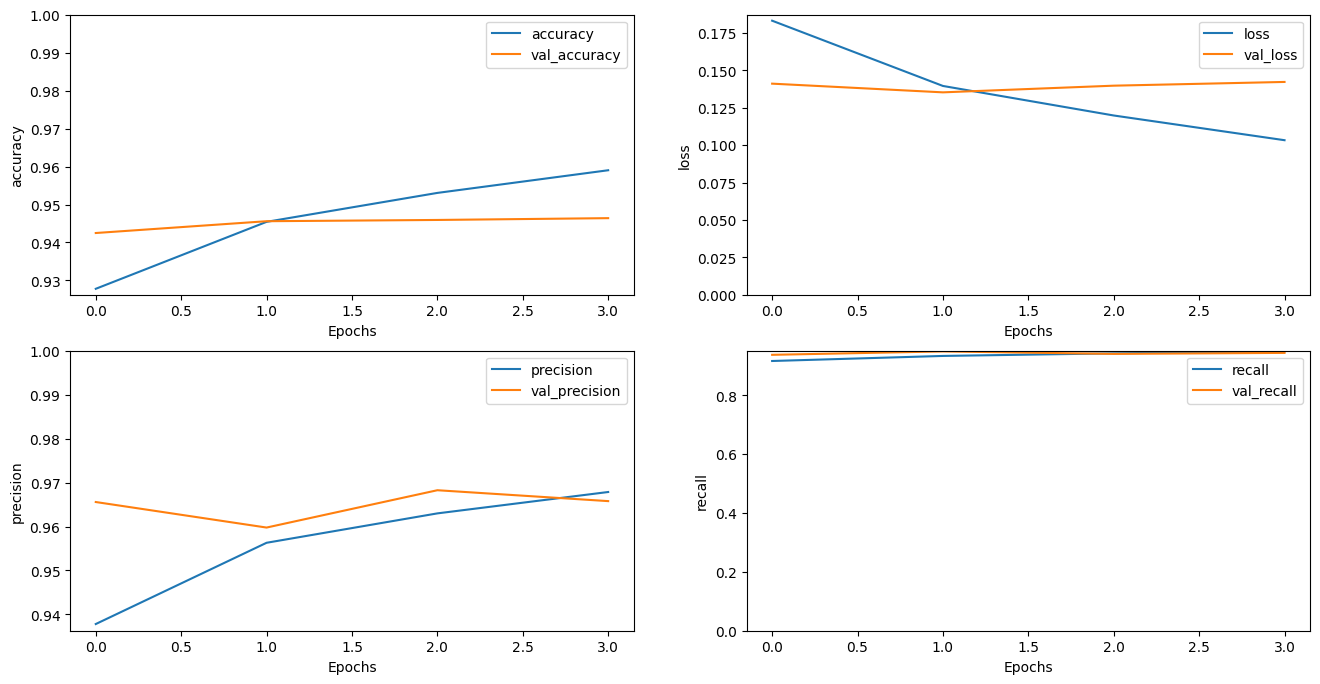

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])

#automate plotting of four subplots (acc, loss, prec, recall)
#use history object returned by model.fit()
#compares TRAINING and VALIDATION performance for each metric across epochs
def model_plot_graph(history):
    plt.figure(figsize=(16, 8))

    plt.subplot(2, 2, 1)
    plot_graphs(history, 'accuracy')
    plt.ylim(None, 1)

    plt.subplot(2, 2, 2)
    plot_graphs(history, 'loss')
    plt.ylim(0, None)

    plt.subplot(2, 2, 3)
    plot_graphs(history, 'precision')
    plt.ylim(None, 1)

    plt.subplot(2, 2, 4)
    plot_graphs(history, 'recall')
    plt.ylim(0, None)
    

model_plot_graph(history)

In [18]:
#import saved best model
from tensorflow.keras.models import load_model
# Load the best model from the checkpoint
best_model = load_model(checkpoint_filepath, compile=False)


19638/19638 ━━━━━━━━━━━━━━━━━━━━ 123s 6ms/step
 Train Set Evaluation
  Accuracy : 0.9573
  Precision: 0.9539
  Recall   : 0.9610
  F1 Score : 0.9575

Classification Report:
              precision    recall  f1-score   support

           0     0.9608    0.9536    0.9572    314196
           1     0.9539    0.9610    0.9575    314196

    accuracy                         0.9573    628392
   macro avg     0.9573    0.9573    0.9573    628392
weighted avg     0.9573    0.9573    0.9573    628392



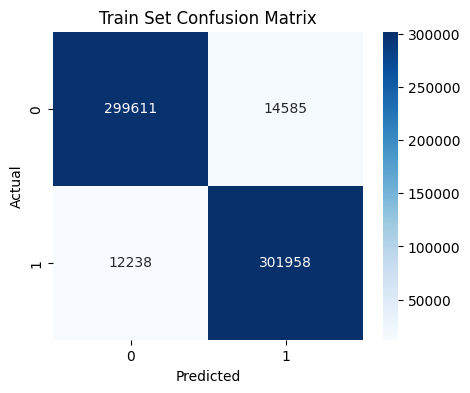

7644/7644 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step
 Test Set Evaluation
  Accuracy : 0.9468
  Precision: 0.9604
  Recall   : 0.9503
  F1 Score : 0.9553

Classification Report:
              precision    recall  f1-score   support

           0     0.9270    0.9415    0.9342     98187
           1     0.9604    0.9503    0.9553    146411

    accuracy                         0.9468    244598
   macro avg     0.9437    0.9459    0.9448    244598
weighted avg     0.9470    0.9468    0.9468    244598



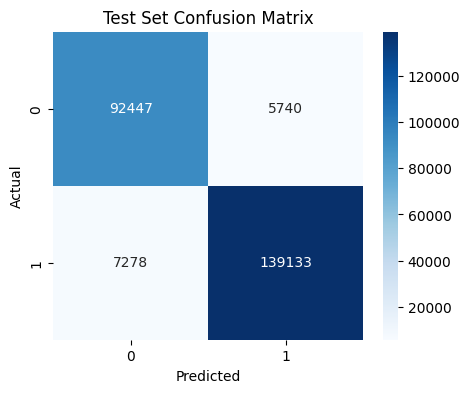

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model_sklearn(model, X, y, label="Test Set"):
    # Predict probabilities and round to binary (0 or 1)
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    # Metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f" {label} Evaluation")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{label} Confusion Matrix")
    plt.show()

evaluate_model_sklearn(best_model, X_train_pad, y_train, label="Train Set")
evaluate_model_sklearn(best_model, X_test_pad, y_test, label="Test Set")


19638/19638 ━━━━━━━━━━━━━━━━━━━━ 123s 6ms/step
 Train Set Evaluation
  Accuracy : 0.96
  Precision: 0.95
  Recall   : 0.96
  F1 Score : 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    314196
           1       0.95      0.96      0.96    314196

    accuracy                           0.96    628392
   macro avg       0.96      0.96      0.96    628392
weighted avg       0.96      0.96      0.96    628392



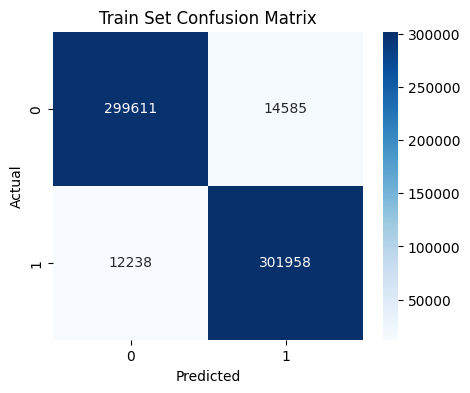

7644/7644 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step
 Test Set Evaluation
  Accuracy : 0.95
  Precision: 0.96
  Recall   : 0.95
  F1 Score : 0.96

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     98187
           1       0.96      0.95      0.96    146411

    accuracy                           0.95    244598
   macro avg       0.94      0.95      0.94    244598
weighted avg       0.95      0.95      0.95    244598



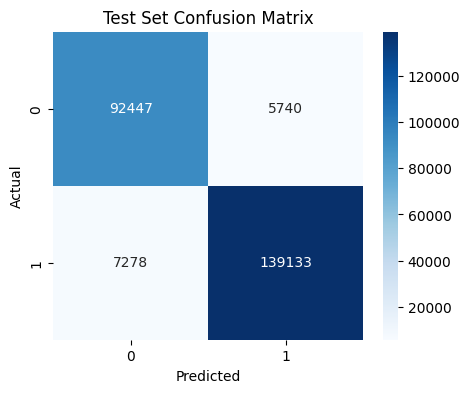

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model_sklearn2(model, X, y, label="Test Set"):
    # Predict probabilities and round to binary (0 or 1)
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    # Metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f" {label} Evaluation")
    print(f"  Accuracy : {acc:.2f}")
    print(f"  Precision: {prec:.2f}")
    print(f"  Recall   : {rec:.2f}")
    print(f"  F1 Score : {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred, digits=2))

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{label} Confusion Matrix")
    plt.show()

evaluate_model_sklearn2(best_model, X_train_pad, y_train, label="Train Set")
evaluate_model_sklearn2(best_model, X_test_pad, y_test, label="Test Set")

**ROC AUC SCORE**

7644/7644 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step
ROC AUC Score: 0.9888


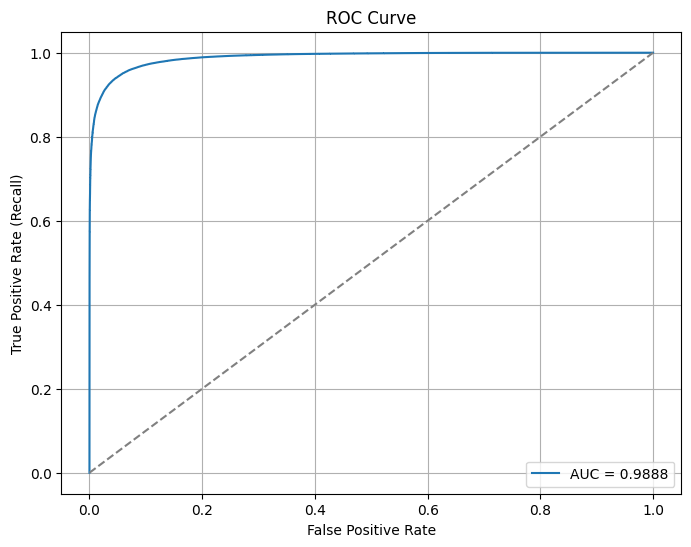

In [21]:
#get predicted probabilities 
y_pred_prob = best_model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

#compute ROC AUC score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

#plot the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#plotting
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,label = f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1],linestyle ='--', color = 'gray') #random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.grid(True)
plt.show()

**LOG LOSS**

In [22]:
#predict probabilities
#compute log loss

from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {logloss:.4f}")

Log Loss: 0.1342


**SAVE MODEL**

In [23]:
model.save("fix_ANNbaseline.keras")
model.save("fix_ANNbaseline.h5")

**CONFIDENCE DISTRIBUTION**

 123/7644 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step

7644/7644 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step


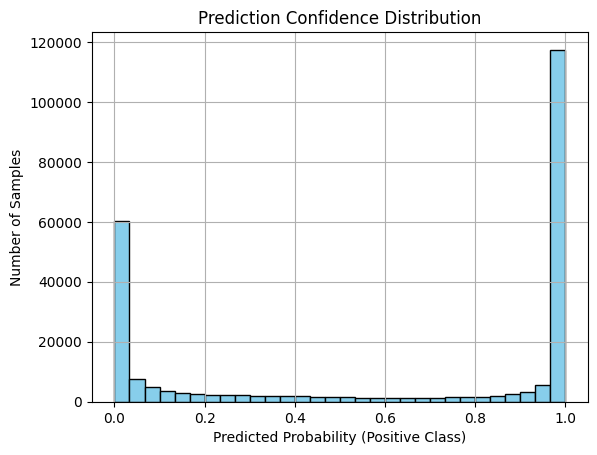

In [24]:
import matplotlib.pyplot as plt

# Get predicted probabilities on test set
y_pred_prob = best_model.predict(X_test_pad)

plt.hist(y_pred_prob, bins=30, color='skyblue', edgecolor='black')
plt.title("Prediction Confidence Distribution")
plt.xlabel("Predicted Probability (Positive Class)")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()

**PRECISION RECALL CURVE**

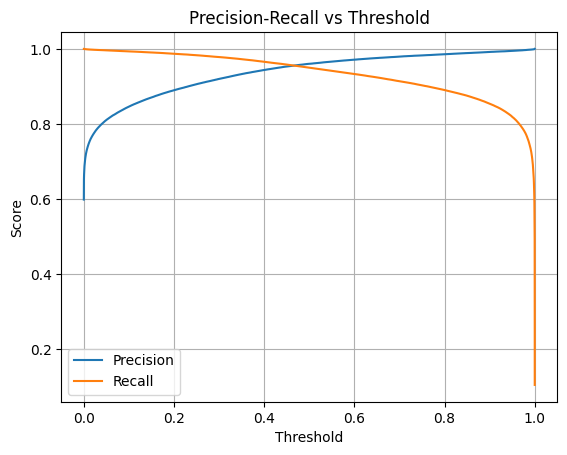

In [25]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.title("Precision-Recall vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

**FIND THE BEST THRESHOLD BY F1 SCORE**  
cut off point that turns a model's probability output into a class label  
this is the model output for POSITIVE CLASS  
0.92 -> very confident its positive
0.04 -> very confident its negative
0.48 -> unsure  

the probability must be converted into a discrete class 0 or 1 using a threshold

threshold 0.5 -> the model only predicts "positive" when its more than 50% sure. conservative
threshold 0.37 - the model allows positive even if its just 37% confident. more inclusive. favors recall

In [26]:
import numpy as np
from sklearn.metrics import f1_score

# Initialize tracking
best_thresh = 0.0
best_f1 = 0.0
f1_scores = []

# Evaluate F1 for thresholds between 0.1 and 0.9
thresholds = np.arange(0.1, 0.91, 0.01)
for thresh in thresholds:
    y_pred_thresh = (y_pred_prob > thresh).astype("int32")
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)
    
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

print(f"Best threshold: {best_thresh:.2f} with F1 score: {best_f1:.4f}")

Best threshold: 0.45 with F1 score: 0.9558


7644/7644 ━━━━━━━━━━━━━━━━━━━━ 49s 6ms/step
 Test Set Evaluation
  Accuracy : 0.9468
  Precision: 0.9604
  Recall   : 0.9503
  F1 Score : 0.9553

Classification Report:
              precision    recall  f1-score   support

           0     0.9270    0.9415    0.9342     98187
           1     0.9604    0.9503    0.9553    146411

    accuracy                         0.9468    244598
   macro avg     0.9437    0.9459    0.9448    244598
weighted avg     0.9470    0.9468    0.9468    244598



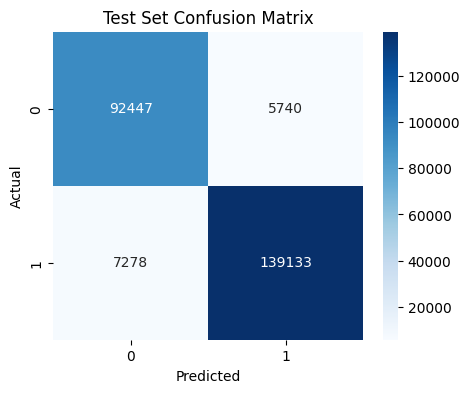

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluate_model_sklearn3(model, X, y, threshold, label="Test Set"):
    # Predict probabilities and round to binary (0 or 1)
    y_pred_prob = model.predict(X)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    # Metrics
    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred)
    rec = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    print(f" {label} Evaluation")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"{label} Confusion Matrix")
    plt.show()


evaluate_model_sklearn3(best_model, X_test_pad, y_test, threshold = best_thresh, label="Test Set")